In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

theme, cs = rp.mpl_setup(False)

In [2]:
full_df = pd.read_csv('mpc_full_feats_scaled.csv')
full_df

,comp,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,...,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char,magmom_pa,bandgap,delta_e
0,In1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,2.864224,0.012442,-1.758536,...,0.736468,-0.897172,2.898265,-0.491331,1.126444,-1.719267,-1.586857,-0.353789,-0.755203,0.003319
1,Mg1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.041303,-1.662893,-1.758536,...,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-1.719267,-1.586857,-0.353818,-0.755203,0.039182
2,Be1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.669525,-2.025128,-1.758536,...,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-1.719267,-1.586857,-0.353808,-0.755203,0.108143
3,Hf1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,4.670362,1.053866,-1.758536,...,0.736468,-1.775903,-0.170443,5.575198,1.126444,-1.719267,-1.586857,-0.353823,-0.755203,0.071216
4,P1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,0.194281,-1.527055,-1.758536,...,0.736468,0.860289,-0.937619,-0.491331,1.126444,-1.719267,-1.586857,1.800892,0.530558,3.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83982,Sr3Ga2O6,-0.302121,-0.381007,-0.400640,-0.352507,-0.312792,-0.281489,-0.355414,-0.485631,-0.301156,...,0.736468,0.301097,-0.240186,-0.491331,1.126444,0.989118,1.332711,-0.353808,1.498985,-2.832238
83983,Sr3Al2O6,-0.302121,-0.381007,-0.400640,-0.352507,-0.312792,-0.281489,-0.355414,-0.485631,-0.301156,...,0.736468,0.301097,-0.937619,-0.491331,1.126444,0.989118,1.414305,-0.353808,1.932665,-3.358646
83984,Mg1Sb2H24O18,0.816031,0.032336,-0.123024,-0.284798,-0.340703,-0.361663,-0.905108,0.103001,0.670431,...,-1.654310,-0.252770,-0.767136,-0.491331,1.126444,0.612892,-0.186458,-0.353815,1.343324,-1.533338
83985,Ga1H18C3N9F6,1.934183,-1.183171,-1.046070,-0.904795,-0.839077,-0.792893,-0.905108,-0.802586,-0.301156,...,-1.444309,-0.255936,-0.833947,-0.491331,1.126444,0.659439,-0.181771,-0.353808,2.425733,-1.066094


In [3]:
full_df_nonweird = full_df.drop(columns=['comp']).dropna(axis='columns')
full_df_nonweird = full_df_nonweird[full_df_nonweird.columns[np.percentile(full_df_nonweird, [5, 95], axis=0).std(axis=0) != 0]]
print(full_df_nonweird.isna().any().any())
full_df_nonweird

False


,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,mean Number,...,avg_dev SpaceGroupNumber,mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,magmom_pa,bandgap,delta_e
0,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,2.864224,0.012442,-1.758536,1.581580,...,-1.747087,0.656792,0.736468,-0.897172,2.898265,-0.491331,1.126444,-0.353789,-0.755203,0.003319
1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.041303,-1.662893,-1.758536,-0.788759,...,-1.747087,1.284503,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-0.353818,-0.755203,0.039182
2,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.669525,-2.025128,-1.758536,-1.301265,...,-1.747087,1.284503,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-0.353808,-0.755203,0.108143
3,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,4.670362,1.053866,-1.758536,3.055034,...,-1.747087,1.284503,0.736468,-1.775903,-0.170443,5.575198,1.126444,-0.353823,-0.755203,0.071216
4,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,0.194281,-1.527055,-1.758536,-0.596569,...,-1.747087,-0.906778,0.736468,0.860289,-0.937619,-0.491331,1.126444,1.800892,0.530558,3.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83982,-0.302121,-0.381007,-0.400640,-0.352507,-0.312792,-0.281489,-0.355414,-0.485631,-0.301156,-0.252957,...,0.479609,-0.792649,0.736468,0.301097,-0.240186,-0.491331,1.126444,-0.353808,1.498985,-2.832238
83983,-0.302121,-0.381007,-0.400640,-0.352507,-0.312792,-0.281489,-0.355414,-0.485631,-0.301156,-0.462619,...,1.217202,-0.792649,0.736468,0.301097,-0.937619,-0.491331,1.126444,-0.353808,1.932665,-3.358646
83984,0.816031,0.032336,-0.123024,-0.284798,-0.340703,-0.361663,-0.905108,0.103001,0.670431,-1.156055,...,0.676787,1.284503,-1.654310,-0.252770,-0.767136,-0.491331,1.126444,-0.353815,1.343324,-1.533338
83985,1.934183,-1.183171,-1.046070,-0.904795,-0.839077,-0.792893,-0.905108,-0.802586,-0.301156,-1.238933,...,-0.266107,1.284503,-1.444309,-0.255936,-0.833947,-0.491331,1.126444,-0.353808,2.425733,-1.066094


In [4]:
subs = full_df_nonweird.iloc[:2000]
subs

,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,minimum Number,maximum Number,range Number,mean Number,...,avg_dev SpaceGroupNumber,mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,magmom_pa,bandgap,delta_e
0,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,2.864224,0.012442,-1.758536,1.581580,...,-1.747087,0.656792,0.736468,-0.897172,2.898265,-0.491331,1.126444,-0.353789,-0.755203,0.003319
1,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.041303,-1.662893,-1.758536,-0.788759,...,-1.747087,1.284503,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-0.353818,-0.755203,0.039182
2,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,-0.669525,-2.025128,-1.758536,-1.301265,...,-1.747087,1.284503,0.736468,-1.775903,-0.937619,-0.491331,1.126444,-0.353808,-0.755203,0.108143
3,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,4.670362,1.053866,-1.758536,3.055034,...,-1.747087,1.284503,0.736468,-1.775903,-0.170443,5.575198,1.126444,-0.353823,-0.755203,0.071216
4,-2.538425,4.293820,4.091097,3.840694,3.733512,3.659722,0.194281,-1.527055,-1.758536,-0.596569,...,-1.747087,-0.906778,0.736468,0.860289,-0.937619,-0.491331,1.126444,1.800892,0.530558,3.509988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.302121,-1.139670,-1.376859,-1.599241,-1.704515,-1.785748,0.979558,0.103001,-0.495473,1.026365,...,-1.061038,0.964941,-0.757768,-0.897172,2.003225,-0.491331,-0.887749,0.420874,-0.755203,-0.007263
1996,-1.420273,1.020174,0.862042,0.778011,0.768635,0.769720,4.120668,1.370821,-1.078425,3.204514,...,-1.360405,1.638304,-2.252005,-1.775903,1.619637,4.852992,-0.887749,-0.353678,-0.755203,-0.860130
1997,-0.302121,-1.139670,-1.376859,-1.599241,-1.704515,-1.785748,-0.748052,1.551939,2.127811,0.535214,...,0.741400,-0.792649,-0.757768,-0.897172,0.341009,1.530845,-0.887749,-0.353798,-0.523851,-0.403105
1998,-1.420273,1.020174,0.862042,0.778011,0.768635,0.769720,2.707168,0.736911,-0.884108,1.837833,...,-1.360405,1.638304,-2.252005,-1.775903,1.619637,0.808640,-0.887749,-0.353637,-0.755203,-0.317656


In [5]:
# from sklearn.neighbors import KernelDensity
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# pca = PCA(n_components=32)
# pca_X = pca.fit_transform(subs.values)
# km = KMeans(n_clusters=12)
# clusts = km.fit_predict(pca_X)

# scores = np.zeros_like(clusts, dtype=np.float64)
# for clust in np.unique(clusts):
#     kde = KernelDensity()
#     kde.fit(pca_X[clusts == clust])
#     scores[clusts == clust] = kde.score_samples(pca_X[clusts == clust])

# sns.ecdfplot(scores)

In [14]:
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm

target_size = 500
sub_size = 128
df = full_df_nonweird.copy(deep=True).iloc[::1]
num_splits = int(np.log2(df.shape[0] / target_size))

splits = pd.Series(np.zeros_like(df.index), index=df.index)
for split in range(num_splits):
    inds = np.arange(0, len(df.index), sub_size)
    for i in tqdm(np.arange(0, len(df.index), sub_size)):
        subsample = np.arange(i, min(df.shape[0], i + sub_size))
        orig_len = len(subsample)
        subs = df.iloc[subsample]
        dists = squareform(pdist(subs, metric='cityblock'))

        sub_is = np.arange(len(subsample))

        avg_dist = np.nanmean(dists, axis=1)
        while len(sub_is) >= orig_len // 2:
            dists_sub = dists[sub_is][:, sub_is]
            ii, jj = np.unravel_index(np.argsort(dists_sub, axis=None), dists_sub.shape)
            ii, jj = ii[ii < jj], jj[ii < jj]
            dist_ii = avg_dist[sub_is][ii]
            dist_jj = avg_dist[sub_is][jj]

            to_take = ii
            to_take[dist_jj < dist_ii] = jj[dist_jj < dist_ii]

            worst = set()
            for w in to_take:
                if w in worst or len(sub_is) - len(worst) < orig_len // 2:
                    break
                else:
                    worst.add(w)

            sub_is = sub_is[~np.isin(np.arange(len(sub_is)), list(worst))]

        # print(subsample[sub_is])
        splits.loc[df.index[subsample[sub_is]]] += 1

    # print(splits.value_counts().sort_index())
    df = df[splits == max(splits)]


splits.mean()

100%|██████████| 323/323 [00:01<00:00, 186.86it/s]
/tmp/ipykernel_1344212/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 159/159 [00:00<00:00, 200.11it/s]
/tmp/ipykernel_1344212/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 79/79 [00:00<00:00, 217.47it/s]
/tmp/ipykernel_1344212/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 39/39 [00:00<00:00, 235.30it/s]
/tmp/ipykernel_1344212/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
100%|██████████| 19/19 [00:00<00:00, 208.36it/s]
/tmp/ipykernel_1344212/3781180221.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[splits == max(splits)]
1

0.9623394096705442

In [15]:
splits.value_counts().sort_index(ascending=False).cumsum()

7      586
6     1193
5     2424
4     4927
3    10013
2    20345
1    41336
0    83987
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

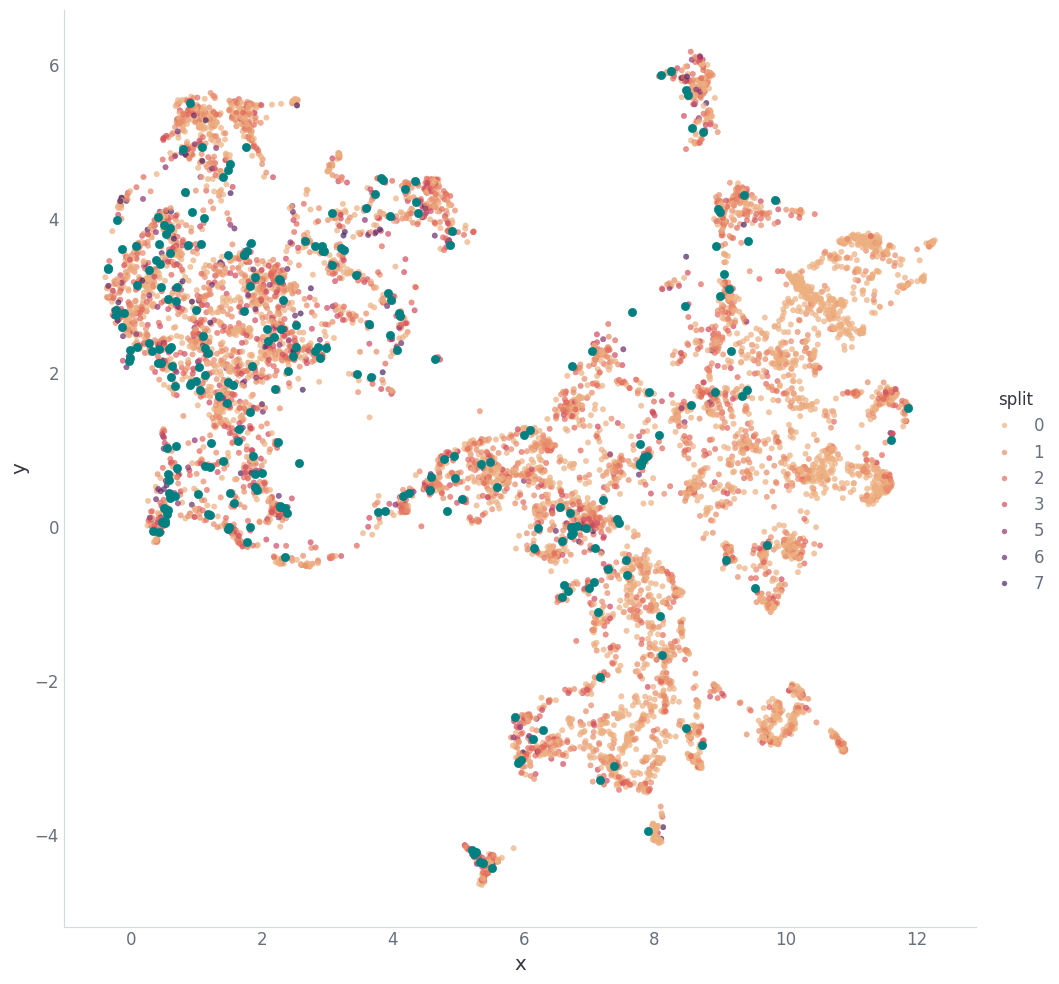

In [30]:
from umap import UMAP

umap_subs = full_df_nonweird.iloc[::10]

um = UMAP(n_neighbors=100, metric='manhattan')
umap_x = um.fit_transform(umap_subs.values)

um_df = pd.DataFrame(umap_x, columns=['x', 'y'], index=umap_subs.index)
um_df['split'] = splits

sns.relplot(um_df.query('split != 4'), x='x', y='y', ec=None, alpha=0.7, hue='split', s=15, height=10, palette='flare', legend='full')

sns.scatterplot(um_df.query('split == 4'), x='x', y='y', s=35, c='teal', ec=None, legend=None)

In [23]:
full_df['dataset_split'] = splits
full_df.to_csv('mpc_full_feats_scaled_split.csv', index=False)

In [28]:
for split in set(splits):
    subs = full_df.query('dataset_split >= @split')
    subs.drop(columns=['dataset_split']).to_csv(f'splits/mpc_full_feats_scaled_{len(subs.index)}_{split}.csv', index=False)

In [ ]:
# import FADS
# import warnings

# subsample_size = 8192

# fastds = FADS.FADS(full_df_nonweird.values)

# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     ds_idx = fastds.DS(subsample_size)

# ds_idx